# Importando as bibliotecas

In [ ]:
# Importando os pacotes 
import numpy as np
import pandas as pd
from collections import Counter
from collections import OrderedDict
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import tensorflow as tf

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Acessando o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lendo a base de dados

In [ ]:
# Lendo a base de dados T2DM
proteins_df = pd.read_csv('/content/drive/MyDrive/data/T2DM.csv')

#listando as primeiras linhas dos dados brutos
proteins_df.head()

,sample,oral_diagnosis,10,10.1,10.2,10.3,10.4,10.6,10.7,10.8,...,116.8,117.2,117.7,118.1,118.6,119,119.5,119.9,120.3,120.8
0,d1122,healthy,-25.914129,-23.452141,-21.871117,-21.210798,-21.288846,-21.716526,-22.019759,-21.936364,...,-0.559903,-0.579124,-0.605411,-0.678184,-0.762884,-0.802476,-0.842608,-0.949803,-1.056248,-1.204233
1,d1127,healthy,30.009298,25.470681,21.091446,16.567655,11.966096,7.862154,4.840252,3.230077,...,0.194887,0.193811,0.159261,0.142836,0.063425,0.014713,0.249692,0.639062,0.756553,0.260613
2,d1132,healthy,1.189316,0.311821,-0.650945,-1.482789,-2.165292,-2.871626,-3.798211,-4.996671,...,-0.124318,-0.060696,-0.187310,-0.306752,-0.436057,-0.443535,-0.352437,-0.281034,-0.341342,-0.600182
3,d1138,healthy,-75.559437,-69.737279,-64.713278,-60.567400,-57.302297,-54.775247,-52.723187,-50.992564,...,2.180825,1.749241,1.150148,0.605548,0.261067,0.124330,0.091145,0.051586,-0.025612,-0.121965
4,d1143,healthy,-68.754269,-66.336908,-62.772999,-58.763431,-54.673525,-50.691290,-46.983391,-43.648640,...,-0.799998,-0.713311,-0.615692,-0.559534,-0.616110,-0.781134,-0.987033,-1.135313,-1.211224,-1.319517


# Análise estatística da base bruta

In [ ]:
# Análise estatística da base bruta
proteins_df.describe()

,10,10.1,10.2,10.3,10.4,10.6,10.7,10.8,10.9,11.1,...,116.8,117.2,117.7,118.1,118.6,119,119.5,119.9,120.3,120.8
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,7.530581,7.304334,6.354433,4.730059,2.614185,0.301207,-1.891154,-3.808100,-5.367923,-6.428548,...,-1.216123,-1.232902,-1.227476,-1.221719,-1.260023,-1.338948,-1.422772,-1.519242,-1.660932,-1.856325
std,43.057702,41.636756,39.735752,37.337606,34.209685,30.151611,26.231737,22.943270,20.309065,18.418337,...,2.134126,2.120435,2.099056,2.103117,2.141683,2.207864,2.416523,2.568369,2.423691,2.283926
min,-75.860910,-69.737279,-64.713278,-60.567400,-57.302297,-54.775247,-52.723187,-50.992564,-49.552306,-48.436704,...,-14.953761,-14.499978,-13.838176,-13.299505,-13.255199,-13.440531,-13.293281,-12.793982,-12.666494,-12.682320
25%,-12.325427,-12.930762,-13.073160,-13.443008,-14.123406,-15.334639,-16.157487,-15.699888,-17.031262,-17.303938,...,-1.775166,-1.847976,-1.886305,-1.876403,-2.004002,-2.212347,-2.335063,-2.512522,-2.614721,-2.771941
50%,3.166851,2.061925,1.359512,0.462986,-0.813408,-2.333931,-3.353596,-4.899524,-5.608758,-5.904354,...,-0.798820,-0.731537,-0.712607,-0.690233,-0.904083,-0.971550,-1.073044,-1.251331,-1.442438,-1.602643
75%,22.904750,22.397935,17.811011,16.497414,13.742271,10.854888,7.506362,5.483081,3.151360,1.957049,...,-0.145996,-0.171379,-0.083798,-0.028365,-0.053105,-0.075659,-0.222583,-0.323530,-0.458481,-0.693588
max,225.265290,236.824758,245.455605,247.646670,236.088752,203.930932,160.972439,120.618590,91.624973,74.332533,...,7.101510,5.570517,3.644452,2.741207,3.893536,4.982889,10.827554,14.809191,9.625104,4.405416


In [ ]:
# Quantidade de linhas e atributos
proteins_df.shape

(170, 396)

# Normalizando a base em torno de 0
Pegando o valor absoluto do mínimo valor negativo de cada linha e soma aos outros valores. 
Desta forma o valor mínimo de cada linha passa a ser zero.
Dropando a coluna Sample, de identificação dos pacientes

In [ ]:
proteins_df_positive = proteins_df.drop(columns=['sample', 'oral_diagnosis'])
min_values = proteins_df_positive.min(axis=1)

for i in range(len(min_values)):
    if min_values[i] < 0:
        proteins_df_positive.loc[i] += abs(min_values[i])

proteins_df_positive.insert(0, 'sample', proteins_df['sample'])
proteins_df_positive = pd.merge(proteins_df_positive, proteins_df[['sample', 'oral_diagnosis']], on='sample', how='left')
proteins_df_positive.to_csv('/content/drive/MyDrive/data/proteins_dataset_positive.csv', index=False)

proteins_df_positive.head()
dados = proteins_df_positive.drop(columns=['sample'])
dados.head()

,10,10.1,10.2,10.3,10.4,10.6,10.7,10.8,10.9,11.1,...,117.2,117.7,118.1,118.6,119,119.5,119.9,120.3,120.8,oral_diagnosis
0,0.000000,2.461988,4.043012,4.703331,4.625283,4.197604,3.894371,3.977765,4.357224,5.038589,...,25.335005,25.308718,25.235945,25.151245,25.111653,25.071521,24.964326,24.857882,24.709896,healthy
1,33.766739,29.228122,24.848887,20.325096,15.723538,11.619596,8.597694,6.987518,6.158756,5.714625,...,3.951252,3.916703,3.900278,3.820867,3.772155,4.007133,4.396504,4.513994,4.018055,healthy
2,22.624354,21.746858,20.784092,19.952248,19.269746,18.563412,17.636826,16.438366,15.250820,14.312436,...,21.374341,21.247727,21.128285,20.998980,20.991503,21.082600,21.154003,21.093695,20.834855,healthy
3,0.000000,5.822158,10.846160,14.992037,18.257141,20.784190,22.836251,24.566873,26.007132,27.362541,...,77.308679,76.709585,76.164985,75.820504,75.683768,75.650583,75.611023,75.533825,75.437473,healthy
4,0.000000,2.417361,5.981270,9.990838,14.080744,18.062979,21.770878,25.105629,27.598798,29.338182,...,68.040958,68.138577,68.194735,68.138159,67.973135,67.767236,67.618956,67.543045,67.434752,healthy


In [ ]:
dados.shape # Excluiu a coluna Sample

(170, 395)

# Análise estatística da base normalizada

In [ ]:
# Análise estatística da base normalizada
dados.describe()

,10,10.1,10.2,10.3,10.4,10.6,10.7,10.8,10.9,11.1,...,116.8,117.2,117.7,118.1,118.6,119,119.5,119.9,120.3,120.8
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,24.946669,24.720422,23.770521,22.146146,20.030273,17.717295,15.524934,13.607988,12.048165,10.987540,...,16.199965,16.183185,16.188611,16.194369,16.156065,16.077140,15.993316,15.896846,15.755156,15.559763
std,35.738750,34.776855,33.296857,31.301326,28.543127,24.782651,21.183606,18.209705,15.809771,14.105853,...,16.521389,16.511742,16.492551,16.454728,16.430232,16.521745,16.691946,16.786521,16.732812,16.639717
min,0.000000,0.485436,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.541594,0.305781,0.080729,0.024966,0.134958,0.232327,0.000000,0.139085,0.058987,0.000000
25%,0.463988,4.446485,5.695382,5.894334,4.636724,3.924654,2.873639,1.753288,1.082832,1.435453,...,5.080226,4.924167,4.984716,4.787638,4.719113,4.775779,4.755808,4.701423,4.618663,4.399347
50%,14.419784,13.188970,13.449680,12.298999,11.783782,10.436664,8.963128,7.575724,6.384613,5.734223,...,9.952801,9.838035,10.033716,9.966688,9.755023,9.924849,10.107198,9.692469,9.220631,9.131324
75%,32.373664,30.414508,27.758171,24.106267,24.340452,22.794250,20.831169,17.865488,15.290205,14.173880,...,20.458840,20.706977,21.096171,20.930380,21.132407,20.952427,20.641311,20.617017,20.573051,20.419392
max,230.268025,241.827492,250.458340,252.649405,241.091486,208.933667,165.975174,125.621325,96.627707,79.335267,...,77.740262,77.308679,76.709585,76.164985,75.820504,75.746964,75.770228,75.749949,75.763543,75.836208


# Mostrando o balanceamento da base de dados

In [ ]:
#T2DM (Diabeticos) e healthy (Não Diabeticos)
dados.groupby('oral_diagnosis').size()

oral_diagnosis
T2DM        52
healthy    118
dtype: int64

# Agrupando os dados como doentes e não doentes

In [ ]:
dados_grupo = dados.groupby('oral_diagnosis')


Agrupando pela **MÉDIA**

In [ ]:
#agrupa pela MÉDIA
dados_media = dados_grupo.mean().T
dados_media.head()

oral_diagnosis,T2DM,healthy
10,23.654449,25.516122
10.1,22.502066,25.698002
10.2,20.839105,25.062332
10.3,18.731840,23.650756
10.4,16.402046,21.629152


Agrupando pela **MEDIANA**

In [ ]:
#agrupa pela MEDIANA
dados_mediana = dados_grupo.median().T
dados_mediana.head()

oral_diagnosis,T2DM,healthy
10,14.052996,14.419784
10.1,12.200846,13.346624
10.2,11.715613,14.037873
10.3,8.924520,12.595521
10.4,8.728445,13.363455


# Plotando os Gráficos

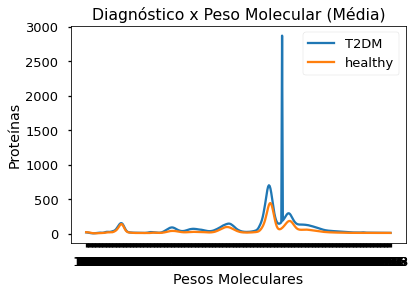

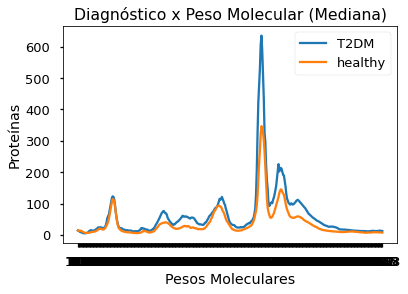

In [ ]:
from pylab import plot, show, legend, title, xlabel, ylabel
plot(dados_media)
title('Diagnóstico x Peso Molecular (Média)')
xlabel('Pesos Moleculares')
ylabel('Proteínas')
legend(['T2DM','healthy'])
show()

from pylab import plot, show, legend, title, xlabel, ylabel
plot(dados_mediana)
title('Diagnóstico x Peso Molecular (Mediana)')
xlabel('Pesos Moleculares')
ylabel('Proteínas')
legend(['T2DM','healthy'])
show()


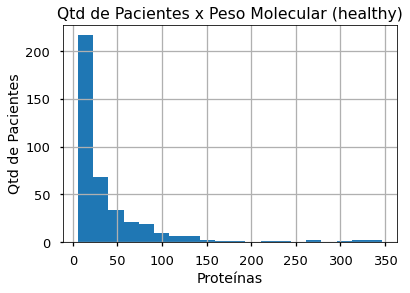

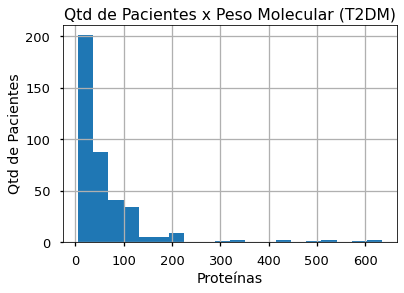

In [ ]:
dados_mediana.healthy.hist(bins = 20)
plt.xlabel("Proteínas")
plt.ylabel("Qtd de Pacientes")
plt.title("Qtd de Pacientes x Peso Molecular (healthy)")
plt.show()

dados_mediana.T2DM.hist(bins = 20)
plt.xlabel("Proteínas")
plt.ylabel("Qtd de Pacientes")
plt.title("Qtd de Pacientes x Peso Molecular (T2DM)")
plt.show()

# Modificando a classe (T2DM , healthy) para binário (1 , 0)

In [ ]:
# Definindo as classes
dados_map = {"T2DM" : 1, "healthy" : 0}

In [ ]:
# Aplicando o mapeamento ao dataset
dados['oral_diagnosis'] = dados['oral_diagnosis'].map(dados_map)

In [ ]:
dados.head()

,10,10.1,10.2,10.3,10.4,10.6,10.7,10.8,10.9,11.1,...,117.2,117.7,118.1,118.6,119,119.5,119.9,120.3,120.8,oral_diagnosis
0,0.000000,2.461988,4.043012,4.703331,4.625283,4.197604,3.894371,3.977765,4.357224,5.038589,...,25.335005,25.308718,25.235945,25.151245,25.111653,25.071521,24.964326,24.857882,24.709896,0
1,33.766739,29.228122,24.848887,20.325096,15.723538,11.619596,8.597694,6.987518,6.158756,5.714625,...,3.951252,3.916703,3.900278,3.820867,3.772155,4.007133,4.396504,4.513994,4.018055,0
2,22.624354,21.746858,20.784092,19.952248,19.269746,18.563412,17.636826,16.438366,15.250820,14.312436,...,21.374341,21.247727,21.128285,20.998980,20.991503,21.082600,21.154003,21.093695,20.834855,0
3,0.000000,5.822158,10.846160,14.992037,18.257141,20.784190,22.836251,24.566873,26.007132,27.362541,...,77.308679,76.709585,76.164985,75.820504,75.683768,75.650583,75.611023,75.533825,75.437473,0
4,0.000000,2.417361,5.981270,9.990838,14.080744,18.062979,21.770878,25.105629,27.598798,29.338182,...,68.040958,68.138577,68.194735,68.138159,67.973135,67.767236,67.618956,67.543045,67.434752,0


In [ ]:
# T2DM=1 , healthy=0
dados.groupby('oral_diagnosis').size()

oral_diagnosis
0    118
1     52
dtype: int64

# Separando a coluna de classe das colunas de atributos

In [ ]:
# Separa os atributos e a classe dos dados em x e y
X = dados.values[: , 0:393]
y = dados.values[: , 394]

In [ ]:
# Atributos
X

array([[ 0.        ,  2.46198804,  4.04301224, ..., 25.07152088,
        24.96432594, 24.85788161],
       [33.7667394 , 29.22812243, 24.84888709, ...,  4.00713345,
         4.39650368,  4.51399433],
       [22.62435379, 21.74685806, 20.78409222, ..., 21.08260035,
        21.15400301, 21.09369501],
       ...,
       [ 9.39267445,  8.83812186,  7.78681846, ...,  3.18287225,
         3.12309688,  2.96922087],
       [27.77775784, 30.80996946, 32.73745599, ...,  3.89353361,
         3.7327556 ,  3.65290258],
       [21.75569166, 24.15195549, 25.35388988, ...,  4.16002606,
         4.03645046,  4.79617491]])

In [ ]:
# Target
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Definindo uma semente aleatória (para garantirmos a reprodutibilidade destes resultados), em seguida faremos a separação dos conjuntos de treino e teste por meio da função train_test_split()** 

In [ ]:
# % da divisão dos dados de treinamento e teste:
split=0.20

In [ ]:
# quantidade de vezes que rodamos para ter os resultados
loops = 40

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)

In [ ]:
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(136, 393) (136,)
(34, 393) (34,)


# Métricas de avaliação

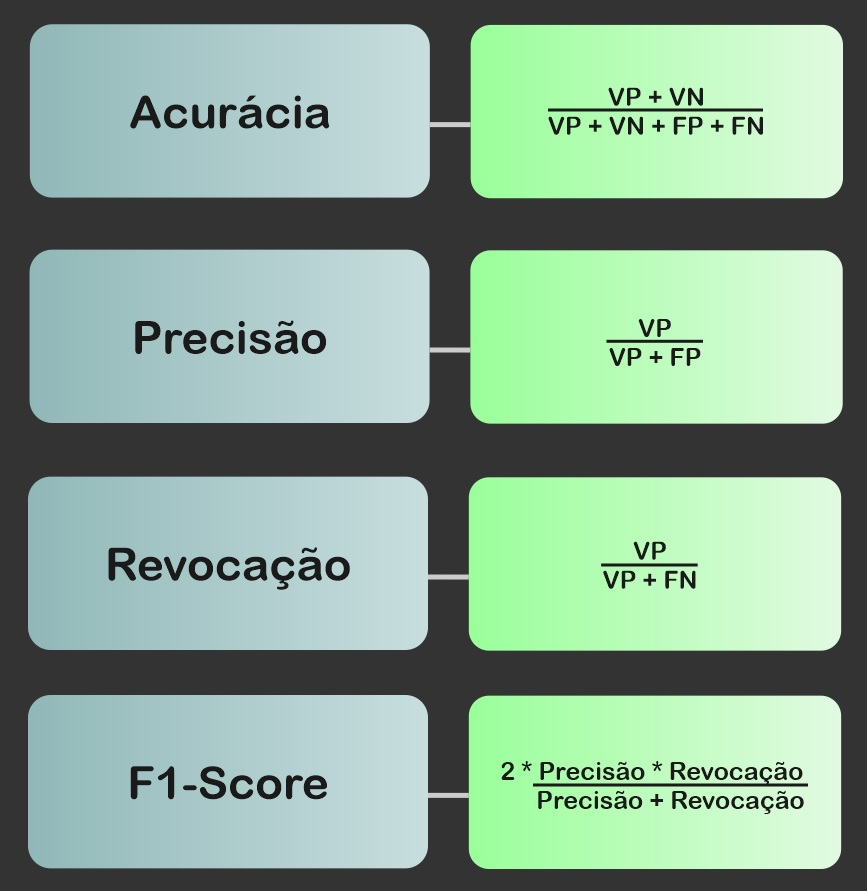

In [ ]:
# Matrix de Confusão
from IPython.display import Image
Image('/content/drive/MyDrive/Rodrigo_Saliva_Mestrado/metricas.jpg')

# **Criando os modelos de classificação**

# **1. Logistic Regression**

In [ ]:
# Modelo de classificação - LR

resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  # Criando o modelo
  model = LogisticRegression(solver='liblinear')
  # Treinando o modelo com o conjunto de treino
  model.fit(X_train, Y_train)
  # Fazendo as previsões nos conjuntos de teste
  Y_lr_predito = model.predict(X_test)

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test , Y_lr_predito),
                     '%.2f' % precision_score(Y_test , Y_lr_predito),
                     '%.2f' % recall_score(Y_test , Y_lr_predito),
                     '%.2f' % f1_score(Y_test , Y_lr_predito)])
df = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df.T

  
  

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,0.76,0.76,0.79,0.79,0.88,0.85,0.85,0.82,0.85,0.74,...,0.76,0.85,0.71,0.79,0.82,0.82,0.79,0.85,0.82,0.88
Precision,0.67,0.62,0.71,0.64,0.80,0.86,0.73,1.00,0.78,0.56,...,0.75,0.78,0.50,0.71,0.75,0.70,0.67,1.00,0.70,0.80
Recall,0.40,0.50,0.50,0.70,0.80,0.60,0.80,0.40,0.70,0.50,...,0.30,0.70,0.60,0.50,0.60,0.70,0.60,0.50,0.70,0.80
F-Score,0.50,0.56,0.59,0.67,0.80,0.71,0.76,0.57,0.74,0.53,...,0.43,0.74,0.55,0.59,0.67,0.70,0.63,0.67,0.70,0.80


In [ ]:
ac = pd.to_numeric(df['Acuracia'])
pr = pd.to_numeric(df['Precision'])
re = pd.to_numeric(df['Recall'])
fs = pd.to_numeric(df['F-Score'])
result_lr = [ac.describe(), pr.describe(), re.describe(), fs.describe()]
result_lr

[count    40.000000
 mean      0.802000
 std       0.050291
 min       0.680000
 25%       0.760000
 50%       0.820000
 75%       0.850000
 max       0.880000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.719000
 std       0.127053
 min       0.450000
 25%       0.662500
 50%       0.700000
 75%       0.785000
 max       1.000000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.580000
 std       0.139963
 min       0.300000
 25%       0.500000
 50%       0.600000
 75%       0.700000
 max       0.800000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.631250
 std       0.107111
 min       0.400000
 25%       0.557500
 50%       0.650000
 75%       0.710000
 max       0.800000
 Name: F-Score, dtype: float64]

# **1.1. Logistic Regression com Oversample**

**Usando o Oversample (aumentando os dados da classe minoritária)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
# Exibindo a distribuição de classes
print("Antes: ", Counter(Y_train))

# Definindo a estratégia de sub-mostragem 
oversample = SMOTE(sampling_strategy=1) # 1 significa mesma quantidade das amostras(0,1)

# Aplicando a transfomação de reamostragem
X_over , Y_over = oversample.fit_resample(X_train , Y_train)

# Exibindo a distribuição de classes
print("Depois: ", Counter(Y_over))


Antes:  Counter({0.0: 94, 1.0: 42})
Depois:  Counter({0.0: 94, 1.0: 94})


**Aplicando o modelo de classificação com os novos dados(oversample)**

In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  # Criando o modelo
  model = LogisticRegression(solver='liblinear')
  # Treinando o modelo com o conjunto de treino
  model.fit(X_over, Y_over)
  # Fazendo as previsões nos conjuntos de teste
  Y_o_predito = model.predict(X_test)

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test , Y_o_predito),
                     '%.2f' % precision_score(Y_test , Y_o_predito),
                     '%.2f' % recall_score(Y_test , Y_o_predito),
                     '%.2f' % f1_score(Y_test , Y_o_predito)])
df_o = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df_o.T

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,0.91,0.94,0.94,0.97,0.97,0.97,1.00,0.97,1.00,0.97,...,0.97,0.97,0.94,1.00,0.94,0.97,0.97,0.97,0.97,1.00
Precision,0.89,0.90,0.90,0.91,0.91,1.00,1.00,0.91,1.00,1.00,...,1.00,0.91,1.00,1.00,0.90,0.91,1.00,1.00,1.00,1.00
Recall,0.80,0.90,0.90,1.00,1.00,0.90,1.00,1.00,1.00,0.90,...,0.90,1.00,0.80,1.00,0.90,1.00,0.90,0.90,0.90,1.00
F-Score,0.84,0.90,0.90,0.95,0.95,0.95,1.00,0.95,1.00,0.95,...,0.95,0.95,0.89,1.00,0.90,0.95,0.95,0.95,0.95,1.00


In [ ]:
ac = pd.to_numeric(df_o['Acuracia'])
pr = pd.to_numeric(df_o['Precision'])
re = pd.to_numeric(df_o['Recall'])
fs = pd.to_numeric(df_o['F-Score'])
result_lr_o = [ac.describe(), pr.describe(), re.describe(), fs.describe()]
result_lr_o

[count    40.000000
 mean      0.963250
 std       0.023026
 min       0.910000
 25%       0.940000
 50%       0.970000
 75%       0.970000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.947750
 std       0.051813
 min       0.830000
 25%       0.900000
 50%       0.910000
 75%       1.000000
 max       1.000000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.932500
 std       0.065584
 min       0.800000
 25%       0.900000
 50%       0.900000
 75%       1.000000
 max       1.000000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.938000
 std       0.039626
 min       0.840000
 25%       0.900000
 50%       0.950000
 75%       0.950000
 max       1.000000
 Name: F-Score, dtype: float64]


# **1.2. Grid Search Cross Validation - LOGISTIC REGRESSION**

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_over, Y_over)
#logreg_cv.fit(X_train , Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9105263157894736


In [ ]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_over, Y_over)
print("score",logreg2.score(X_test,Y_test))

score 1.0


In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  # Criando o modelo
  # Para conjuntos de dados pequenos, 'liblinear' é uma boa escolha
  model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, 
                                 class_weight=None, random_state=None, solver='lbfgs', max_iter=100, 
                                 multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
  # Treinando o modelo com o conjunto de treino
  model.fit(X_over, Y_over)
  # Fazendo as previsões nos conjuntos de teste
  Y_o_predito = model.predict(X_test)

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test , Y_o_predito),
                     '%.2f' % precision_score(Y_test , Y_o_predito),
                     '%.2f' % recall_score(Y_test , Y_o_predito),
                     '%.2f' % f1_score(Y_test , Y_o_predito)])
df_best_o = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df_best_o.T

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,1.00,1.00,0.97,0.97,0.94,0.94,0.94,0.97,0.97,0.97,...,0.97,0.97,0.97,0.97,0.97,1.00,0.97,0.94,0.97,1.00
Precision,1.00,1.00,0.91,1.00,1.00,0.90,0.90,0.91,1.00,0.91,...,1.00,1.00,1.00,1.00,0.91,1.00,1.00,0.90,1.00,1.00
Recall,1.00,1.00,1.00,0.90,0.80,0.90,0.90,1.00,0.90,1.00,...,0.90,0.90,0.90,0.90,1.00,1.00,0.90,0.90,0.90,1.00
F-Score,1.00,1.00,0.95,0.95,0.89,0.90,0.90,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,1.00,0.95,0.90,0.95,1.00


In [ ]:
ac_lr = pd.to_numeric(df_best_o['Acuracia'])
pr_lr = pd.to_numeric(df_best_o['Precision'])
re_lr = pd.to_numeric(df_best_o['Recall'])
fs_lr = pd.to_numeric(df_best_o['F-Score'])
result_lr_o = [ac_lr.describe(), pr_lr.describe(), re_lr.describe(), fs_lr.describe()]
result_lr_o

[count    40.000000
 mean      0.966250
 std       0.025589
 min       0.880000
 25%       0.940000
 50%       0.970000
 75%       0.970000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.952750
 std       0.056477
 min       0.800000
 25%       0.907500
 50%       1.000000
 75%       1.000000
 max       1.000000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.937500
 std       0.062788
 min       0.800000
 25%       0.900000
 50%       0.900000
 75%       1.000000
 max       1.000000
 Name: Recall, dtype: float64, count    40.0000
 mean      0.9435
 std       0.0430
 min       0.8000
 25%       0.9000
 50%       0.9500
 75%       0.9500
 max       1.0000
 Name: F-Score, dtype: float64]

# **Gráficos - Logistic Regression com Grid Search CV**

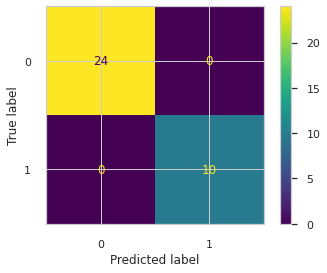

In [ ]:
# Criando uma Confusion Matrix
Y_o_predito = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_o_predito)

cm_display = ConfusionMatrixDisplay(cm).plot()

Desvio Padrão:  0.025267320791884543
Média:  0.9662499999999999


Text(0.5, 1.0, 'Logistic Regression')

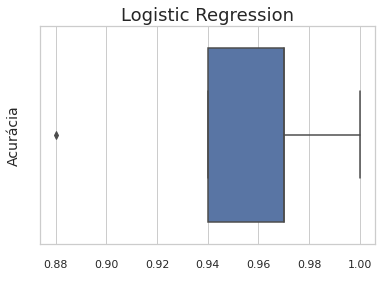

In [ ]:
print("Desvio Padrão: ", np.std(ac_lr))
print("Média: ", np.mean(ac_lr))
ax = sns.boxplot(ac_lr)
plt.ylabel("Acurácia", size=14)
plt.xlabel(" ", size=14)
plt.title("Logistic Regression", size=18)


Desvio Padrão:  0.055766813608094906
Média:  0.9527499999999998


Text(0.5, 1.0, 'Logistic Regression')

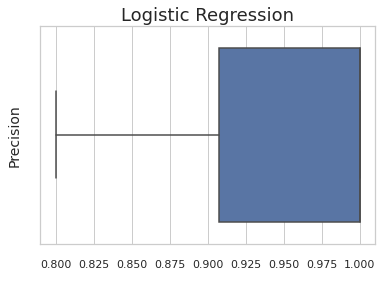

In [ ]:
print("Desvio Padrão: ", np.std(pr_lr))
print("Média: ", np.mean(pr_lr))
ax = sns.boxplot(pr_lr)
plt.ylabel("Precision", size=14)
plt.xlabel(" ", size=14)
plt.title("Logistic Regression", size=18)


Desvio Padrão:  0.0619979838381862
Média:  0.9374999999999997


Text(0.5, 1.0, 'Logistic Regression')

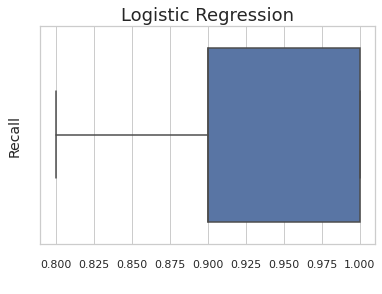

In [ ]:
print("Desvio Padrão: ", np.std(re_lr))
print("Média: ", np.mean(re_lr))
ax = sns.boxplot(re_lr)
plt.ylabel("Recall", size=14)
plt.xlabel(" ", size=14)
plt.title("Logistic Regression", size=18)

Desvio Padrão:  0.04245880356298326
Média:  0.9434999999999999


Text(0.5, 1.0, 'Logistic Regression')

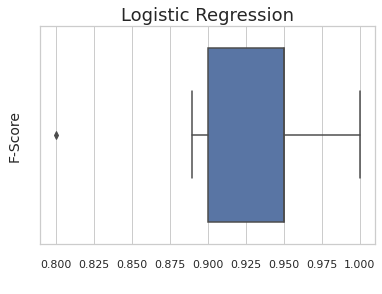

In [ ]:
print("Desvio Padrão: ", np.std(fs_lr))
print("Média: ", np.mean(fs_lr))
ax = sns.boxplot(fs_lr)
plt.ylabel("F-Score", size=14)
plt.xlabel(" ", size=14)
plt.title("Logistic Regression", size=18)

# **2. Random Forest**

**Aplicando o Oversample**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
# Exibindo a distribuição de classes
print("Antes: ", Counter(Y_train))

# Definindo a estratégia de sub-mostragem 
oversample = SMOTE(sampling_strategy=1) # 1 significa mesma quantidade das amostras(0,1)

# Aplicando a transfomação de reamostragem
X_over , Y_over = oversample.fit_resample(X_train , Y_train)

# Exibindo a distribuição de classes
print("Depois: ", Counter(Y_over))

Antes:  Counter({0.0: 94, 1.0: 42})
Depois:  Counter({0.0: 94, 1.0: 94})


**Rodando Random Forest "COM" os dados Oversample**

In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  # Criando o modelo (n_estimators é a quantidade de árvores de decisões do modelo)
  rf = RandomForestClassifier(n_estimators=100,criterion='gini', max_features='log2', random_state=42)
  # Treinando o modelo com o conjunto de treino
  modelo_rf = rf.fit(X_over , Y_over)
  # Fazendo as previsões nos conjuntos de teste
  Y_rf_predito = modelo_rf.predict(X_test)

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test , Y_rf_predito),
                     '%.2f' % precision_score(Y_test , Y_rf_predito),
                     '%.2f' % recall_score(Y_test , Y_rf_predito),
                     '%.2f' % f1_score(Y_test , Y_rf_predito)])
df_rf = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df_rf.T

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,0.97,0.94,0.97,0.97,0.94,1.00,1.00,0.91,0.85,0.97,...,0.97,1.00,0.94,0.97,1.00,1.00,1.00,0.97,0.91,0.94
Precision,0.91,1.00,1.00,1.00,0.90,1.00,1.00,0.89,0.78,1.00,...,0.91,1.00,0.90,0.91,1.00,1.00,1.00,1.00,0.82,0.90
Recall,1.00,0.80,0.90,0.90,0.90,1.00,1.00,0.80,0.70,0.90,...,1.00,1.00,0.90,1.00,1.00,1.00,1.00,0.90,0.90,0.90
F-Score,0.95,0.89,0.95,0.95,0.90,1.00,1.00,0.84,0.74,0.95,...,0.95,1.00,0.90,0.95,1.00,1.00,1.00,0.95,0.86,0.90


In [ ]:
ac = pd.to_numeric(df_rf['Acuracia'])
pr = pd.to_numeric(df_rf['Precision'])
re = pd.to_numeric(df_rf['Recall'])
fs = pd.to_numeric(df_rf['F-Score'])
result_rf = [ac.describe(), pr.describe(), re.describe(), fs.describe()]
result_rf

[count    40.000000
 mean      0.955750
 std       0.036577
 min       0.850000
 25%       0.940000
 50%       0.970000
 75%       0.970000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.948250
 std       0.067478
 min       0.780000
 25%       0.900000
 50%       1.000000
 75%       1.000000
 max       1.000000
 Name: Precision, dtype: float64, count    40.00000
 mean      0.90500
 std       0.08756
 min       0.70000
 25%       0.90000
 50%       0.90000
 75%       1.00000
 max       1.00000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.924250
 std       0.064207
 min       0.740000
 25%       0.900000
 50%       0.950000
 75%       0.950000
 max       1.000000
 Name: F-Score, dtype: float64]

# **2.1. Grid Search Cross Validation - Radom Forest**

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
#CV_rfc.fit(X_train, Y_train)
CV_rfc.fit(X_over , Y_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [ ]:
# Melhores Hiperparâmetros
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [ ]:
# Aplicando os melhores Hiperparâmetros
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_over , Y_over)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200,
                       random_state=42)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y_test,pred))

Accuracy for Random Forest on CV data:  0.9411764705882353


In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  # Criando o modelo (n_estimators é a quantidade de árvores de decisões do modelo)
  rf = RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=8, criterion='entropy')
  # Treinando o modelo com o conjunto de treino
  modelo_rf = rf.fit(X_over , Y_over)
  # Fazendo as previsões nos conjuntos de teste
  Y_rf_predito = modelo_rf.predict(X_test)

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test , Y_rf_predito),
                     '%.2f' % precision_score(Y_test , Y_rf_predito),
                     '%.2f' % recall_score(Y_test , Y_rf_predito),
                     '%.2f' % f1_score(Y_test , Y_rf_predito)])
df_rf = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df_rf.T

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,1.00,1.00,1.00,0.97,0.97,1.00,0.94,0.97,0.97,0.97,...,1.00,0.94,0.97,1.00,0.97,0.97,0.94,0.97,0.97,0.91
Precision,1.00,1.00,1.00,1.00,1.00,1.00,0.90,1.00,0.91,1.00,...,1.00,1.00,0.91,1.00,1.00,1.00,0.90,1.00,1.00,1.00
Recall,1.00,1.00,1.00,0.90,0.90,1.00,0.90,0.90,1.00,0.90,...,1.00,0.80,1.00,1.00,0.90,0.90,0.90,0.90,0.90,0.70
F-Score,1.00,1.00,1.00,0.95,0.95,1.00,0.90,0.95,0.95,0.95,...,1.00,0.89,0.95,1.00,0.95,0.95,0.90,0.95,0.95,0.82


In [ ]:
ac_rf = pd.to_numeric(df_rf['Acuracia'])
pr_rf = pd.to_numeric(df_rf['Precision'])
re_rf = pd.to_numeric(df_rf['Recall'])
fs_rf = pd.to_numeric(df_rf['F-Score'])
result_rf = [ac_rf.describe(), pr_rf.describe(), re_rf.describe(), fs_rf.describe()]
result_rf

[count    40.000000
 mean      0.965500
 std       0.031538
 min       0.880000
 25%       0.940000
 50%       0.970000
 75%       1.000000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.966500
 std       0.054375
 min       0.820000
 25%       0.910000
 50%       1.000000
 75%       1.000000
 max       1.000000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.920000
 std       0.088289
 min       0.700000
 25%       0.900000
 50%       0.900000
 75%       1.000000
 max       1.000000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.940250
 std       0.057266
 min       0.780000
 25%       0.900000
 50%       0.950000
 75%       1.000000
 max       1.000000
 Name: F-Score, dtype: float64]

# **Gráficos - Random Forest com Grid Search CV**

Desvio Padrão:  0.031140809238040034
Média:  0.9654999999999998


Text(0.5, 1.0, 'Random Forest')

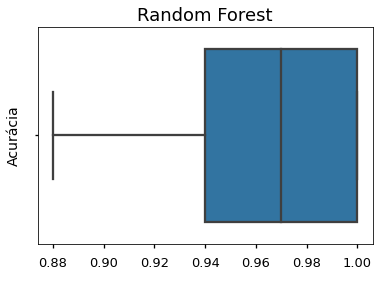

In [ ]:
print("Desvio Padrão: ", np.std(ac_rf))
print("Média: ", np.mean(ac_rf))
ax = sns.boxplot(ac_rf)
plt.ylabel("Acurácia", size=14)
plt.xlabel(" ", size=14)
plt.title("Random Forest", size=18)


Desvio Padrão:  0.053691246958885205
Média:  0.9664999999999999


Text(0.5, 1.0, 'Random Forest')

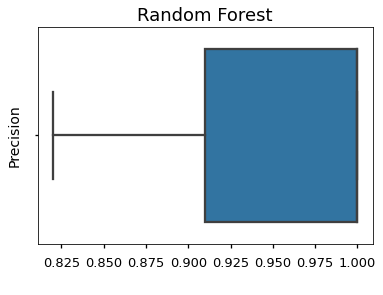

In [ ]:
print("Desvio Padrão: ", np.std(pr_rf))
print("Média: ", np.mean(pr_rf))
ax = sns.boxplot(pr_rf)
plt.ylabel("Precision", size=14)
plt.xlabel(" ", size=14)
plt.title("Random Forest", size=18)


Desvio Padrão:  0.08717797887081348
Média:  0.9199999999999999


Text(0.5, 1.0, 'Random Forest')

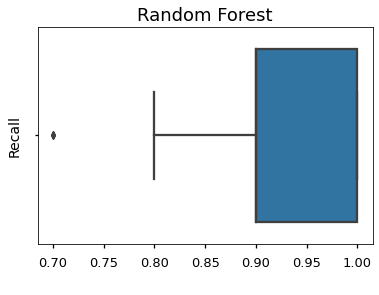

In [ ]:
print("Desvio Padrão: ", np.std(re_rf))
print("Média: ", np.mean(re_rf))
ax = sns.boxplot(re_rf)
plt.ylabel("Recall", size=14)
plt.xlabel(" ", size=14)
plt.title("Random Forest", size=18)

Desvio Padrão:  0.056545888444695956
Média:  0.9402500000000001


Text(0.5, 1.0, 'Random Forest')

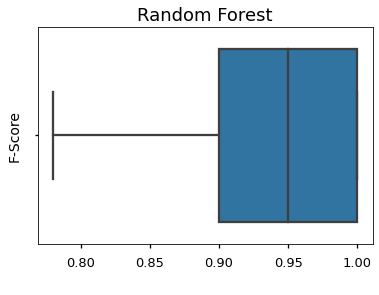

In [ ]:
print("Desvio Padrão: ", np.std(fs_rf))
print("Média: ", np.mean(fs_rf))
ax = sns.boxplot(fs_rf)
plt.ylabel("F-Score", size=14)
plt.xlabel(" ", size=14)
plt.title("Random Forest", size=18)

#**3. MLP**



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
# Exibindo a distribuição de classes
print("Antes: ", Counter(Y_train))

# Definindo a estratégia de sub-mostragem 
oversample = SMOTE(sampling_strategy=1) # 1 significa mesma quantidade das amostras(0,1)

# Aplicando a transfomação de reamostragem
X_over , Y_over = oversample.fit_resample(X_train , Y_train)

# Exibindo a distribuição de classes
print("Depois: ", Counter(Y_over))

Antes:  Counter({0.0: 94, 1.0: 42})
Depois:  Counter({1.0: 94, 0.0: 94})


**MLP "COM" Oversample**



In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  #Treinando o mlp
  mlp=MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', alpha=0.0001, max_iter=20000)
  # Treinando o modelo "mlp"
  mlp.fit(X_over,Y_over) # Dados de treino "com Oversample"
  # Fazendo as previsões no modelo de teste
  predictions_test_mlp_over=mlp.predict(X_test) 

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test ,  predictions_test_mlp_over),
                     '%.2f' % precision_score(Y_test ,  predictions_test_mlp_over),
                     '%.2f' % recall_score(Y_test ,  predictions_test_mlp_over),
                     '%.2f' % f1_score(Y_test ,  predictions_test_mlp_over)])
df = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df.T


,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,0.91,0.94,0.94,0.97,0.91,0.97,0.97,1.00,0.88,0.88,...,0.88,1.00,1.00,0.94,0.97,0.97,1.00,1.00,0.97,0.88
Precision,0.77,0.90,0.90,0.91,0.77,0.91,1.00,1.00,0.71,1.00,...,0.88,1.00,1.00,0.90,1.00,1.00,1.00,1.00,0.91,0.80
Recall,1.00,0.90,0.90,1.00,1.00,1.00,0.90,1.00,1.00,0.60,...,0.70,1.00,1.00,0.90,0.90,0.90,1.00,1.00,1.00,0.80
F-Score,0.87,0.90,0.90,0.95,0.87,0.95,0.95,1.00,0.83,0.75,...,0.78,1.00,1.00,0.90,0.95,0.95,1.00,1.00,0.95,0.80


In [ ]:
ac = pd.to_numeric(df['Acuracia'])
pr = pd.to_numeric(df['Precision'])
re = pd.to_numeric(df['Recall'])
fs = pd.to_numeric(df['F-Score'])
result_mlp = [ac.describe(), pr.describe(), re.describe(), fs.describe()]
result_mlp

[count    40.000000
 mean      0.940750
 std       0.044283
 min       0.850000
 25%       0.910000
 50%       0.940000
 75%       0.970000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.893250
 std       0.092885
 min       0.690000
 25%       0.830000
 50%       0.905000
 75%       1.000000
 max       1.000000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.925000
 std       0.100639
 min       0.600000
 25%       0.900000
 50%       1.000000
 75%       1.000000
 max       1.000000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.903250
 std       0.073324
 min       0.750000
 25%       0.855000
 50%       0.910000
 75%       0.950000
 max       1.000000
 Name: F-Score, dtype: float64]

# **3.1. Grid Search Cross Validation - MLP**

In [ ]:
parameters = {'activation': ['relu'], 'solver': ['adam'], 'max_iter': [20000], 'alpha': 10.0 ** -np.arange(1, 100), 'hidden_layer_sizes':np.arange(100, 400)}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_over,Y_over)
print(clf.score(X_over,Y_over))
print(clf.best_params_)

In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  #Treinando o mlp
  mlp=MLPClassifier(hidden_layer_sizes=10, activation='relu', random_state = 2, solver='adam', alpha=0.1, max_iter=20000)
  # Treinando o modelo "mlp"
  mlp.fit(X_over,Y_over) # Dados de treino "com Oversample"
  # Fazendo as previsões no modelo de teste
  predictions_test_mlp_over=mlp.predict(X_test) 

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test ,  predictions_test_mlp_over),
                     '%.2f' % precision_score(Y_test ,  predictions_test_mlp_over),
                     '%.2f' % recall_score(Y_test ,  predictions_test_mlp_over),
                     '%.2f' % f1_score(Y_test ,  predictions_test_mlp_over)])
df = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df.T


,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,0.97,0.97,1.00,0.97,0.97,0.94,0.97,1.00,0.97,1.00,...,0.94,1.00,0.97,0.94,0.97,0.97,0.94,0.97,0.97,0.85
Precision,0.91,0.91,1.00,1.00,1.00,1.00,0.91,1.00,0.91,1.00,...,0.90,1.00,1.00,1.00,0.91,1.00,0.90,1.00,1.00,0.78
Recall,1.00,1.00,1.00,0.90,0.90,0.80,1.00,1.00,1.00,1.00,...,0.90,1.00,0.90,0.80,1.00,0.90,0.90,0.90,0.90,0.70
F-Score,0.95,0.95,1.00,0.95,0.95,0.89,0.95,1.00,0.95,1.00,...,0.90,1.00,0.95,0.89,0.95,0.95,0.90,0.95,0.95,0.74


In [ ]:
ac_mlp = pd.to_numeric(df['Acuracia'])
pr_mlp = pd.to_numeric(df['Precision'])
re_mlp = pd.to_numeric(df['Recall'])
fs_mlp = pd.to_numeric(df['F-Score'])
result_mlp = [ac_mlp.describe(), pr_mlp.describe(), re_mlp.describe(), fs_mlp.describe()]
result_mlp

[count    40.000000
 mean      0.964750
 std       0.027918
 min       0.850000
 25%       0.940000
 50%       0.970000
 75%       0.970000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.00000
 mean      0.95675
 std       0.05465
 min       0.78000
 25%       0.91000
 50%       1.00000
 75%       1.00000
 max       1.00000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.927500
 std       0.075064
 min       0.700000
 25%       0.900000
 50%       0.900000
 75%       1.000000
 max       1.000000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.940000
 std       0.048569
 min       0.740000
 25%       0.900000
 50%       0.950000
 75%       0.950000
 max       1.000000
 Name: F-Score, dtype: float64]

# **Gráficos - MLP com Grid Search CV**

Desvio Padrão:  0.027566963924233672
Média:  0.9647499999999999


Text(0.5, 1.0, 'MLP')

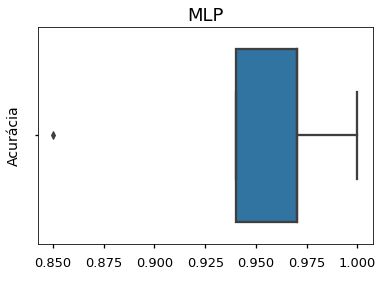

In [ ]:
print("Desvio Padrão: ", np.std(ac_mlp))
print("Média: ", np.mean(ac_mlp))
ax = sns.boxplot(ac_mlp)
plt.ylabel("Acurácia", size=14)
plt.xlabel(" ", size=14)
plt.title("MLP", size=18)


Desvio Padrão:  0.053962371148792175
Média:  0.9567499999999998


Text(0.5, 1.0, 'MLP')

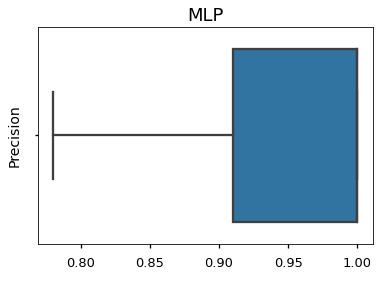

In [ ]:
print("Desvio Padrão: ", np.std(pr_mlp))
print("Média: ", np.mean(pr_mlp))
ax = sns.boxplot(pr_mlp)
plt.ylabel("Precision", size=14)
plt.xlabel(" ", size=14)
plt.title("MLP", size=18)


Desvio Padrão:  0.07411983540186796
Média:  0.9274999999999997


Text(0.5, 1.0, 'MLP')

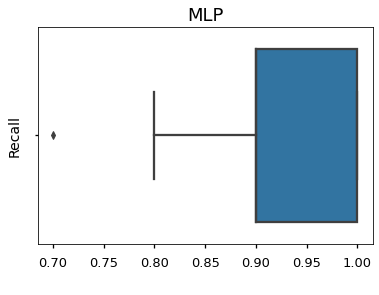

In [ ]:
print("Desvio Padrão: ", np.std(re_mlp))
print("Média: ", np.mean(re_mlp))
ax = sns.boxplot(re_mlp)
plt.ylabel("Recall", size=14)
plt.xlabel(" ", size=14)
plt.title("MLP", size=18)

Desvio Padrão:  0.047958315233127186
Média:  0.9400000000000001


Text(0.5, 1.0, 'MLP')

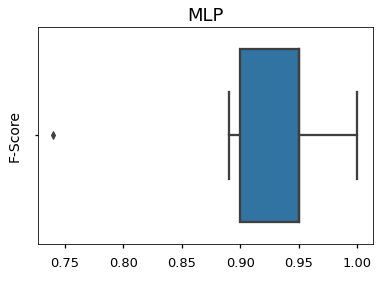

In [ ]:
print("Desvio Padrão: ", np.std(fs_mlp))
print("Média: ", np.mean(fs_mlp))
ax = sns.boxplot(fs_mlp)
plt.ylabel("F-Score", size=14)
plt.xlabel(" ", size=14)
plt.title("MLP", size=18)

# **4. Modelo SVM**

**- Dados com Oversample**

In [ ]:
# Exibindo a distribuição de classes
print("Antes: ", Counter(Y_train))

# Definindo a estratégia de sub-mostragem 
oversample = SMOTE(sampling_strategy=1) # 1 significa mesma quantidade das amostras(0,1)

# Aplicando a transfomação de reamostragem
X_svm_over , Y_svm_over = oversample.fit_resample(X_train , Y_train)

# Exibindo a distribuição de classes
print("Depois: ", Counter(Y_svm_over))


Antes:  Counter({0.0: 94, 1.0: 42})
Depois:  Counter({1.0: 94, 0.0: 94})


**Rodando SVM "COM" os Dados Oversample**

In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  # Criando o modelo
  clf = svm.SVC(kernel='linear')
  # Treinando o modelo
  clf.fit(X_svm_over , Y_svm_over)
  # Fazendo as previsões
  y_predito = clf.predict(X_test)

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test , y_predito),
                     '%.2f' % precision_score(Y_test , y_predito),
                     '%.2f' % recall_score(Y_test , y_predito),
                     '%.2f' % f1_score(Y_test , y_predito)])
df_svm = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df_svm.T

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,0.94,1.00,0.97,0.97,0.91,0.94,1.00,0.97,0.97,0.97,...,0.97,1.00,1.00,1.00,1.00,0.97,1.00,1.00,1.00,1.00
Precision,1.00,1.00,0.91,1.00,1.00,1.00,1.00,1.00,0.91,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Recall,0.80,1.00,1.00,0.90,0.70,0.80,1.00,0.90,1.00,0.90,...,0.90,1.00,1.00,1.00,1.00,0.90,1.00,1.00,1.00,1.00
F-Score,0.89,1.00,0.95,0.95,0.82,0.89,1.00,0.95,0.95,0.95,...,0.95,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00


In [ ]:
ac = pd.to_numeric(df_svm['Acuracia'])
pr = pd.to_numeric(df_svm['Precision'])
re = pd.to_numeric(df_svm['Recall'])
fs = pd.to_numeric(df_svm['F-Score'])
result_svm = [ac.describe(), pr.describe(), re.describe(), fs.describe()]
result_svm

[count    40.000000
 mean      0.977500
 std       0.023288
 min       0.910000
 25%       0.970000
 50%       0.970000
 75%       1.000000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.990750
 std       0.028138
 min       0.900000
 25%       1.000000
 50%       1.000000
 75%       1.000000
 max       1.000000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.935000
 std       0.076962
 min       0.700000
 25%       0.900000
 50%       0.950000
 75%       1.000000
 max       1.000000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.960750
 std       0.042871
 min       0.820000
 25%       0.950000
 50%       0.950000
 75%       1.000000
 max       1.000000
 Name: F-Score, dtype: float64]

# **4.1. Grid Search com Cross Validation - SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 


In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_svm_over , Y_svm_over)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

**Melhores Hiper Parâmetros**

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 0.001}

In [ ]:
grid.best_estimator_

SVC(C=0.1, gamma=0.001)

**Ajustando o modelo com os melhores Hiper Parâmetros**

In [ ]:
modelo_ajustado_svc = SVC(C=10, kernel='linear', gamma=0.001)

In [ ]:
resultados = [] 
for i in range(loops):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, stratify=y)
  # Criando o modelo
  clf_best = modelo_ajustado_svc
  # Treinando o modelo
  clf_best.fit(X_svm_over , Y_svm_over)
  # Fazendo as previsões
  y_predito = clf_best.predict(X_test)

  # Métricas de avaliação
  resultados.append(['%.2f' % accuracy_score(Y_test , y_predito),
                     '%.2f' % precision_score(Y_test , y_predito),
                     '%.2f' % recall_score(Y_test , y_predito),
                     '%.2f' % f1_score(Y_test , y_predito)])
df_svm = pd.DataFrame(resultados, index=range(1,loops+1),columns=['Acuracia', 'Precision', 'Recall', 'F-Score'])

#df.head()
df_svm.T

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Acuracia,1.00,0.97,1.00,0.97,1.00,0.97,0.94,0.97,1.00,1.00,...,1.00,1.00,0.97,1.00,1.00,0.97,0.97,1.00,0.94,1.00
Precision,1.00,1.00,1.00,1.00,1.00,1.00,0.90,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.91,1.00,1.00,1.00,1.00
Recall,1.00,0.90,1.00,0.90,1.00,0.90,0.90,0.90,1.00,1.00,...,1.00,1.00,0.90,1.00,1.00,1.00,0.90,1.00,0.80,1.00
F-Score,1.00,0.95,1.00,0.95,1.00,0.95,0.90,0.95,1.00,1.00,...,1.00,1.00,0.95,1.00,1.00,0.95,0.95,1.00,0.89,1.00


In [ ]:
ac_svm = pd.to_numeric(df_svm['Acuracia'])
pr_svm = pd.to_numeric(df_svm['Precision'])
re_svm = pd.to_numeric(df_svm['Recall'])
fs_svm = pd.to_numeric(df_svm['F-Score'])
result_svm = [ac_svm.describe(), pr_svm.describe(), re_svm.describe(), fs_svm.describe()]
result_svm

[count    40.000000
 mean      0.977500
 std       0.022275
 min       0.940000
 25%       0.970000
 50%       0.970000
 75%       1.000000
 max       1.000000
 Name: Acuracia, dtype: float64, count    40.000000
 mean      0.988000
 std       0.032201
 min       0.900000
 25%       1.000000
 50%       1.000000
 75%       1.000000
 max       1.000000
 Name: Precision, dtype: float64, count    40.000000
 mean      0.937500
 std       0.066747
 min       0.800000
 25%       0.900000
 50%       0.900000
 75%       1.000000
 max       1.000000
 Name: Recall, dtype: float64, count    40.000000
 mean      0.961500
 std       0.038931
 min       0.890000
 25%       0.950000
 50%       0.950000
 75%       1.000000
 max       1.000000
 Name: F-Score, dtype: float64]

# **Gráficos - SVM com Grid Search CV**

Desvio Padrão:  0.021994317447922785
Média:  0.9774999999999998


Text(0.5, 1.0, 'SVM')

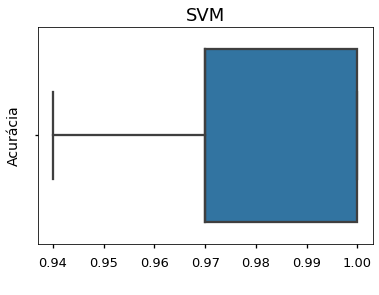

In [ ]:
print("Desvio Padrão: ", np.std(ac_svm))
print("Média: ", np.mean(ac_svm))
ax = sns.boxplot(ac_svm)
plt.ylabel("Acurácia", size=14)
plt.xlabel(" ", size=14)
plt.title("SVM", size=18)


Desvio Padrão:  0.031796226191169286
Média:  0.9879999999999999


Text(0.5, 1.0, 'SVM')

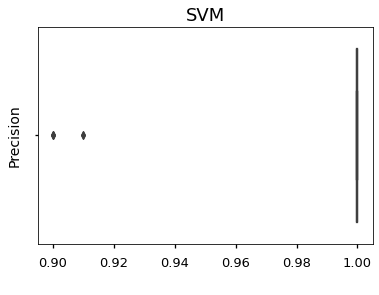

In [ ]:
print("Desvio Padrão: ", np.std(pr_svm))
print("Média: ", np.mean(pr_svm))
ax = sns.boxplot(pr_svm)
plt.ylabel("Precision", size=14)
plt.xlabel(" ", size=14)
plt.title("SVM", size=18)


Desvio Padrão:  0.06590713163232033
Média:  0.9374999999999998


Text(0.5, 1.0, 'SVM')

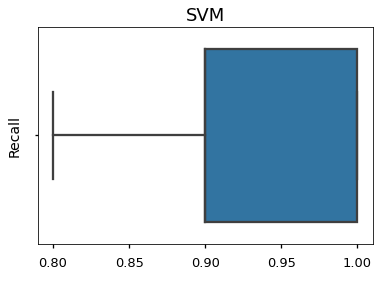

In [ ]:
print("Desvio Padrão: ", np.std(re_svm))
print("Média: ", np.mean(re_svm))
ax = sns.boxplot(re_svm)
plt.ylabel("Recall", size=14)
plt.xlabel(" ", size=14)
plt.title("SVM", size=18)

Desvio Padrão:  0.03844151401805084
Média:  0.9615


Text(0.5, 1.0, 'SVM')

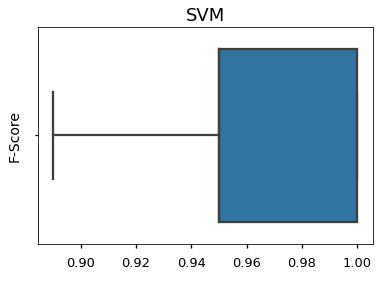

In [ ]:
print("Desvio Padrão: ", np.std(fs_svm))
print("Média: ", np.mean(fs_svm))
ax = sns.boxplot(fs_svm)
plt.ylabel("F-Score", size=14)
plt.xlabel(" ", size=14)
plt.title("SVM", size=18)

# **Comparando os modelos**

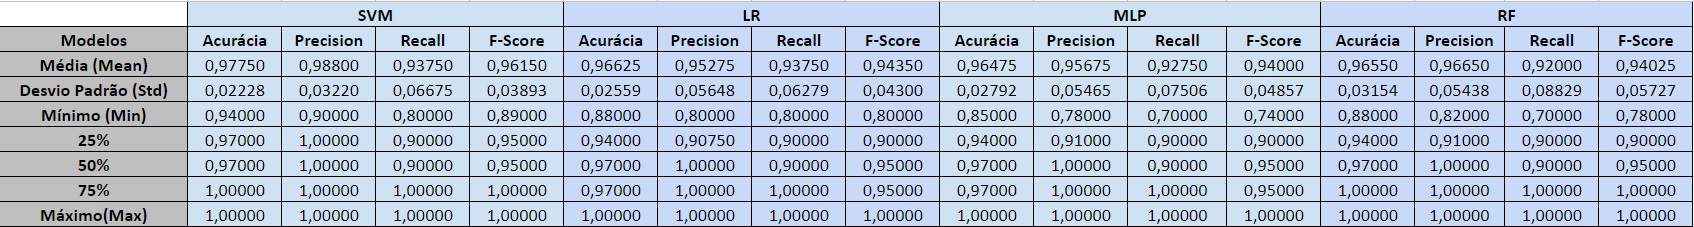

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Rodrigo_Saliva_Mestrado/resultados_finais/Resultados_Rodrigo_Geral.jpg')

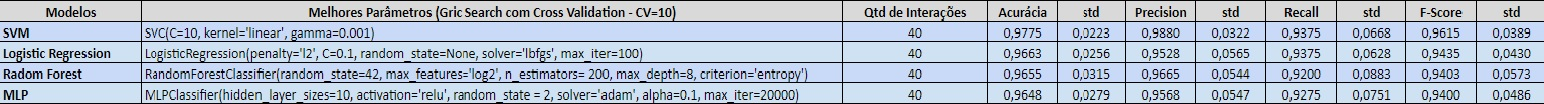

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Rodrigo_Saliva_Mestrado/resultados_finais/Resultados_Rodrigo.jpg')